# Exploratory Data Analysis
This document contains some information on the exploratory data analysis done.

In [175]:
import sys, os, pdb
sys.path.append(os.path.abspath(".."))
from data import BLS

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [177]:
seriesid = "SEFA01, SEFA02, SEFA03, SEFB01, SEFB02, SEFB03, SEFB04, SEFC01, SEFC02, SEFC03, SEFC04, SEFD01, SEFD02, SEFD03, SEFD04, SEFE01, SEFF01, SEFF02, SEFG01, SEFG02, SEFH01, SEFJ01, SEFJ02, SEFJ03, SEFJ04, SEFK01, SEFK02, SEFK03, SEFK04, SEFL01, SEFL02, SEFL03, SEFL04, SEFM01, SEFM02, SEFM03, SEFN01, SEFN02, SEFN03, SEFP01, SEFP02, SEFR01, SEFR02, SEFR03, SEFS01, SEFS02, SEFS03, SEFT01, SEFT02, SEFT03, SEFT04, SEFT05, SEFT06"
seriesid = seriesid.split(", ")
#seriesid

In [178]:
# load data from drive
df = pd.read_csv("../data/raw/CPI.csv", index_col='date')

In [179]:
# load dataset with new BLS api
#start = datetime(1978,1,1)
#end = datetime(2025,8,1)
#api = BLS()
#api.get_data(seriesid,[start,end], save_path="../data/raw/CPI.csv")    # run this a few times as possible since there is a daily limit
#api.get_data(seriesid,[start,end], mode='income', save_path="../data/raw/income.csv")    # run this a few times as possible since there is a daily limit

In [180]:
#

In [181]:
# load dataset with old BLS api
#df1 = pd.read_csv("../data/raw/data2016-2025.csv", index_col='date')
#df2 = pd.read_csv("../data/raw/data2006-2015.csv", index_col='date')
#df3 = pd.read_csv("../data/raw/data1996-2005.csv", index_col='date')
#df4 = pd.read_csv("../data/raw/data1986-1995.csv", index_col='date')
#df5 = pd.read_csv("../data/raw/data1976-1985.csv", index_col='date')
#df = pd.concat([df1,df2, df3, df4, df5]).drop_duplicates()
#df = df.sort_index()
#pd.set_option("display.max_rows", None)
#isna = df.isna().mean()

In [182]:
isna = df.isna().mean()
isna

CUSR0000SEFA01    0.000000
CUSR0000SEFA02    0.279070
CUSR0000SEFA03    0.236136
CUSR0000SEFB01    0.558140
CUSR0000SEFB02    0.601073
CUSR0000SEFB03    0.364937
CUSR0000SEFB04    0.107335
CUSR0000SEFC01    0.000000
CUSR0000SEFC02    0.686941
CUSR0000SEFC03    0.407871
CUSR0000SEFD01    0.407871
CUSR0000SEFD02    0.000000
CUSR0000SEFD03    0.000000
CUSR0000SEFD04    0.407871
CUSR0000SEFF01    0.536673
CUSR0000SEFF02    0.407871
CUSR0000SEFG01    0.665474
CUSR0000SEFG02    0.407871
CUSR0000SEFJ01    0.429338
CUSR0000SEFJ02    0.000000
CUSR0000SEFJ03    0.236136
CUSR0000SEFJ04    0.515206
CUSR0000SEFK01    0.000000
CUSR0000SEFK02    0.000000
CUSR0000SEFK03    0.407871
CUSR0000SEFK04    0.407871
CUSR0000SEFL01    0.000000
CUSR0000SEFL02    0.579606
CUSR0000SEFL03    0.000000
CUSR0000SEFL04    0.000000
CUSR0000SEFM01    0.407871
CUSR0000SEFM02    0.407871
CUSR0000SEFM03    0.407871
CUSR0000SEFN01    0.000000
CUSR0000SEFN03    0.665474
CUSR0000SEFP01    0.515206
CUSR0000SEFP02    0.515206
C

## Preprocessing
We take some time to preprocess the data set. In particular, we search for missing values and truncate the time range of the time series to have a complete dataset that is as long as possible.

In [183]:
# show the correspondences between key codes and the item level descriptions
codes = pd.read_csv("../data/cu-item.tsv", sep="\t", index_col='item_code')

data = []
for col in df.columns:
    na_percent = df[col].isna().mean()
    data.append([col, na_percent, codes.loc[col[8:]].item_name])
dfnan = pd.DataFrame(data)
#dfnan

In [184]:
# Remove all time series variables that are missing more than 30% of the data
# we will later truncate the time
mask = dfnan[1]< .2
dfnan[mask]

,0,1,2
0,CUSR0000SEFA01,0.000000,Flour and prepared flour mixes
6,CUSR0000SEFB04,0.107335,Other bakery products
7,CUSR0000SEFC01,0.000000,Uncooked ground beef
11,CUSR0000SEFD02,0.000000,Ham
12,CUSR0000SEFD03,0.000000,Pork chops
19,CUSR0000SEFJ02,0.000000,Cheese and related products
22,CUSR0000SEFK01,0.000000,Apples
23,CUSR0000SEFK02,0.000000,Bananas
26,CUSR0000SEFL01,0.000000,Potatoes
28,CUSR0000SEFL03,0.000000,Tomatoes


In [185]:
sublist = dfnan[mask][0].tolist()
description = dfnan[mask][2].tolist()
var_dict = dict(zip(sublist, description))
df_sub = df[sublist].copy()
df_sub.dropna(inplace=True)  # truncates time by removing rows
df = df_sub

## Visualization and EDA
Here we plot some variables, and correlation functions to make some quick inferences

In [186]:
from pandas.plotting import lag_plot

def my_grid_plot(df, option='acf', title='code', lag = 1):
    ncols = 3
    nrows = len(df.columns)//3 + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
    axes = axes.flatten() # easier indexing
    i = 0
    for name in df.columns:
        data = df[name].dropna()
        if title == 'description':
            fig_name = var_dict[name]
        elif title == 'code':
            fig_name = name
        if option=='acf':
            plot_acf(data, ax = axes[i], title=fig_name)
        elif option == 'pacf':
            plot_pacf(data, ax = axes[i], title=fig_name)
        elif option == 'timeseries':
            #data = np.log(data)
            data.plot(figsize=(10,10), ax = axes[i], title=fig_name)
            plt.xlabel('Date')
            plt.ylabel('CPI')
        elif option == 'lag':
            lag_plot(data, lag = lag, ax=axes[i])
            axes[i].set_title(fig_name)
        i+=1
    if option == 'timeseries':
        fig.autofmt_xdate()
    plt.tight_layout(h_pad = 3)
    plt.show()

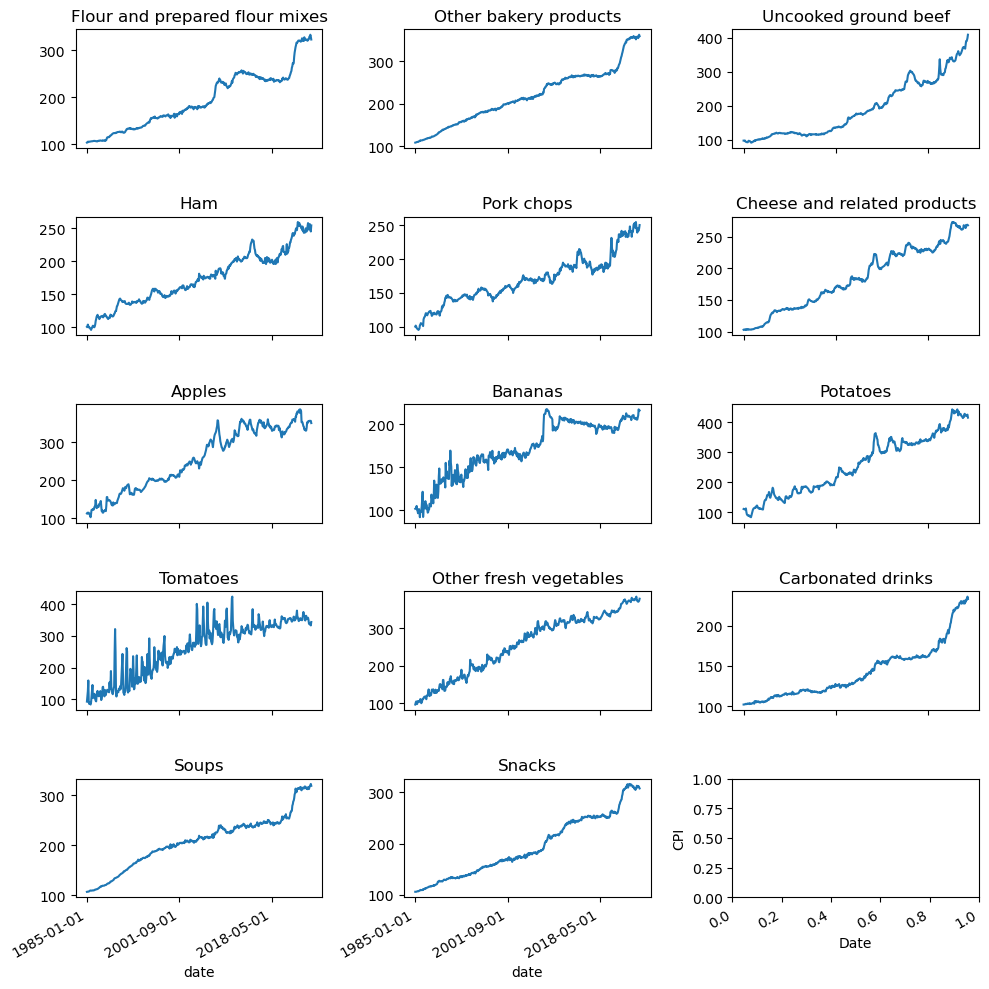

In [187]:
# time series plots
my_grid_plot(df, option="timeseries", title='description')


### Autocorrelation Plot
The acf is compute
$$
\begin{align*}
c_k &= \sum_{t = 1}^{n-k} \frac{1}{n} (x_{t+k} - \overline{x})(x_t - \overline{x}) \\
r_k &= \frac{c_k}{c_0}
\end{align*}
$$
where $k$ is the lag between variables. That is, the measure of $Corr(X_t, X_{t+k})$ (with the aassumption of weak stationarity).

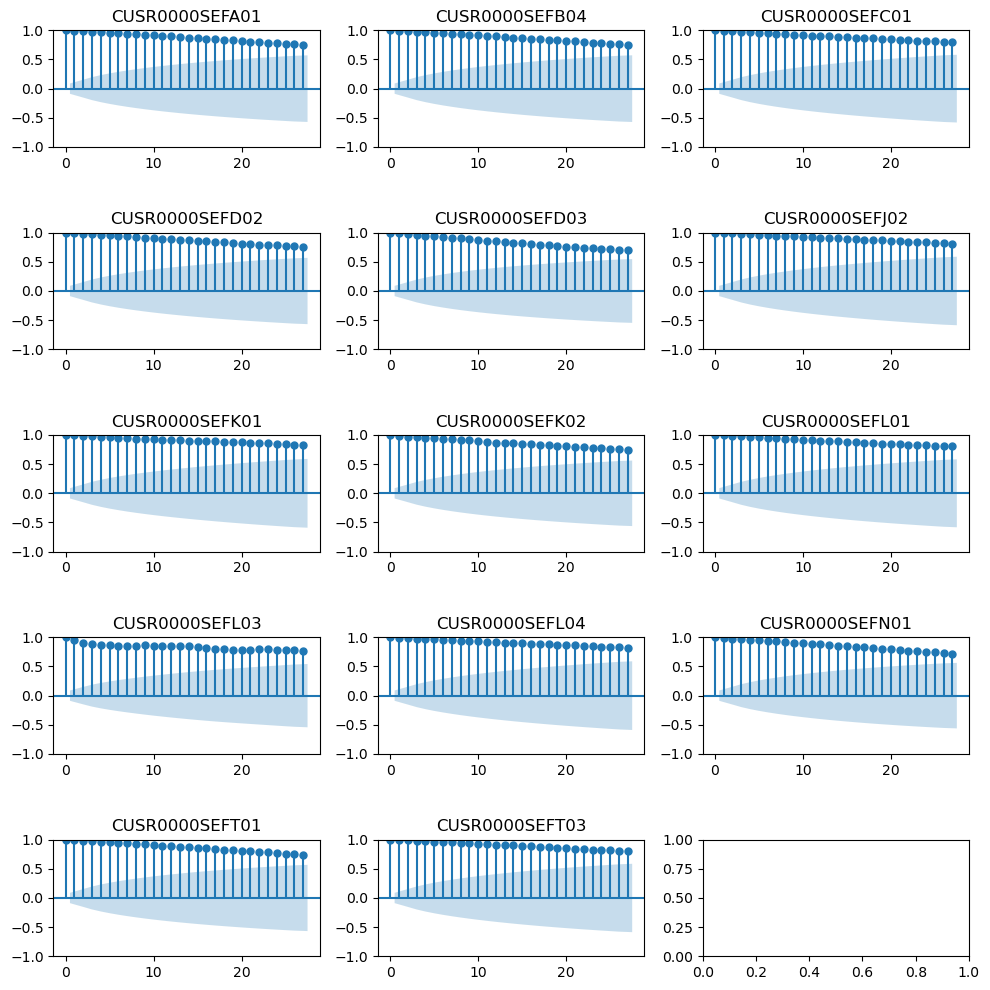

In [188]:
# plot of autocorrelation functions
my_grid_plot(df, "acf")

### Partial Autocorrelation Function
Like the acf, the function estimate correlations but does so $\ldots$

The PACF clearly measures the correlation between $X_{t −k}$ and $X_t$ that is not
explained by $\{X_{t −k+1:t −1}\}$

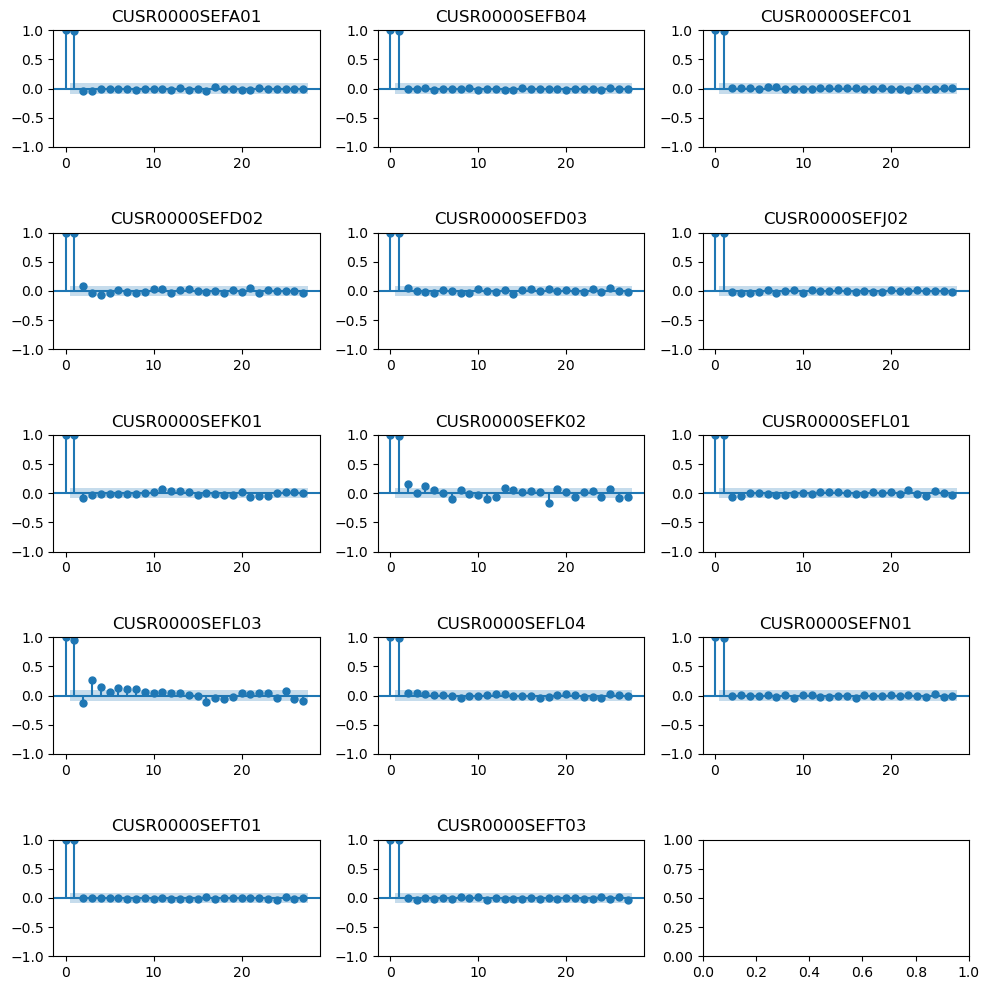

In [189]:
# partial autocorrelation function
my_grid_plot(df, option='pacf')

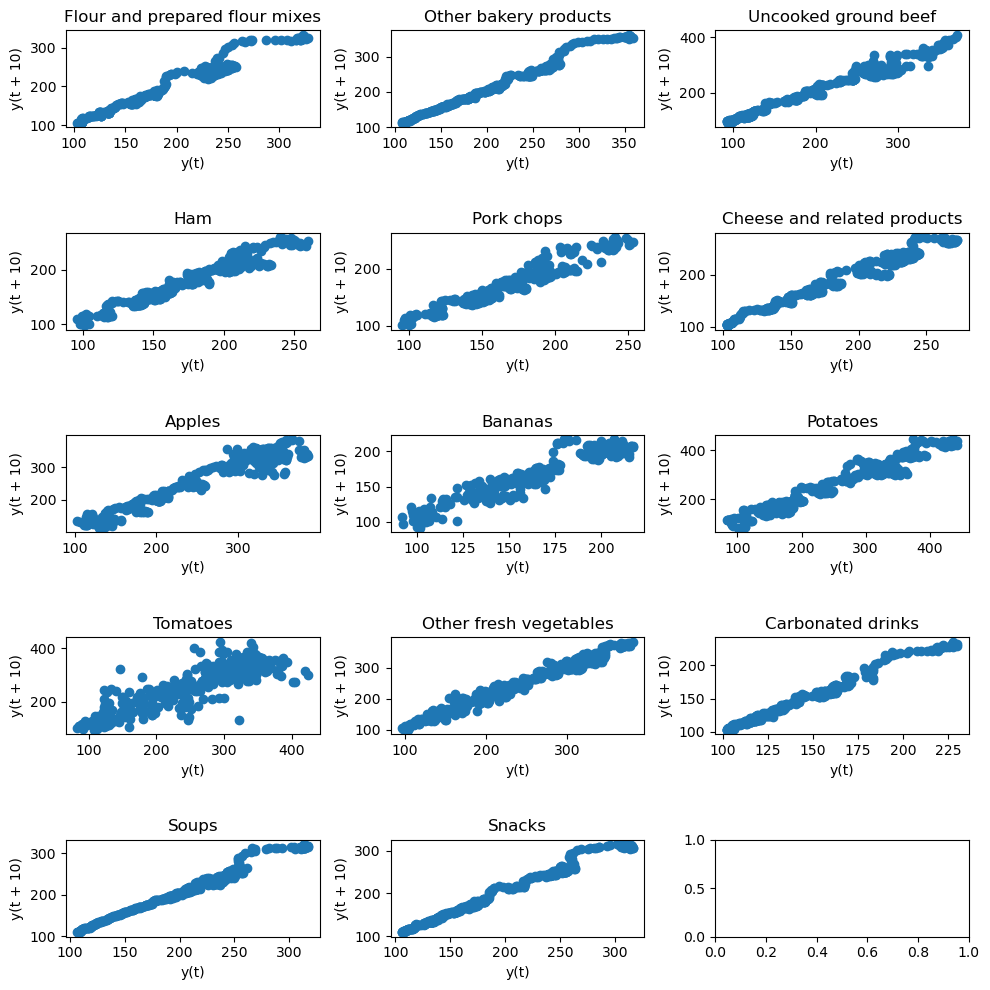

In [190]:
my_grid_plot(df, option='lag', title='description', lag=10)

Loss function should be informed by use of the model.
- baseline 
- consider big life events (e.g. pandemic)
- compare impact on dropping "big events"

In [191]:
#my_grid_plot(df['CUUR000SEFJ01'], option="timeseries")

### Transform with first differences

In [192]:
# time series plots
df_first_diff = np.log(df).diff()
#df_first_diff

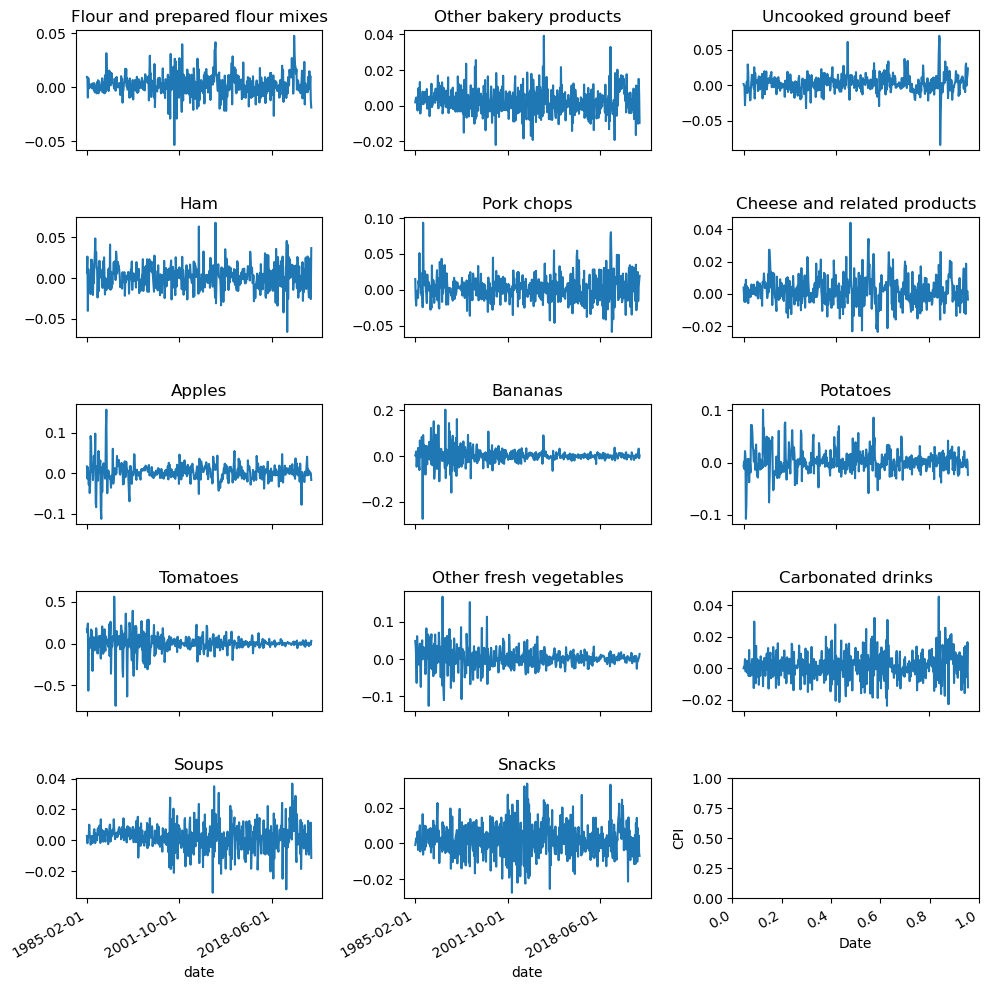

In [193]:
my_grid_plot(df_first_diff, option="timeseries", title='description')

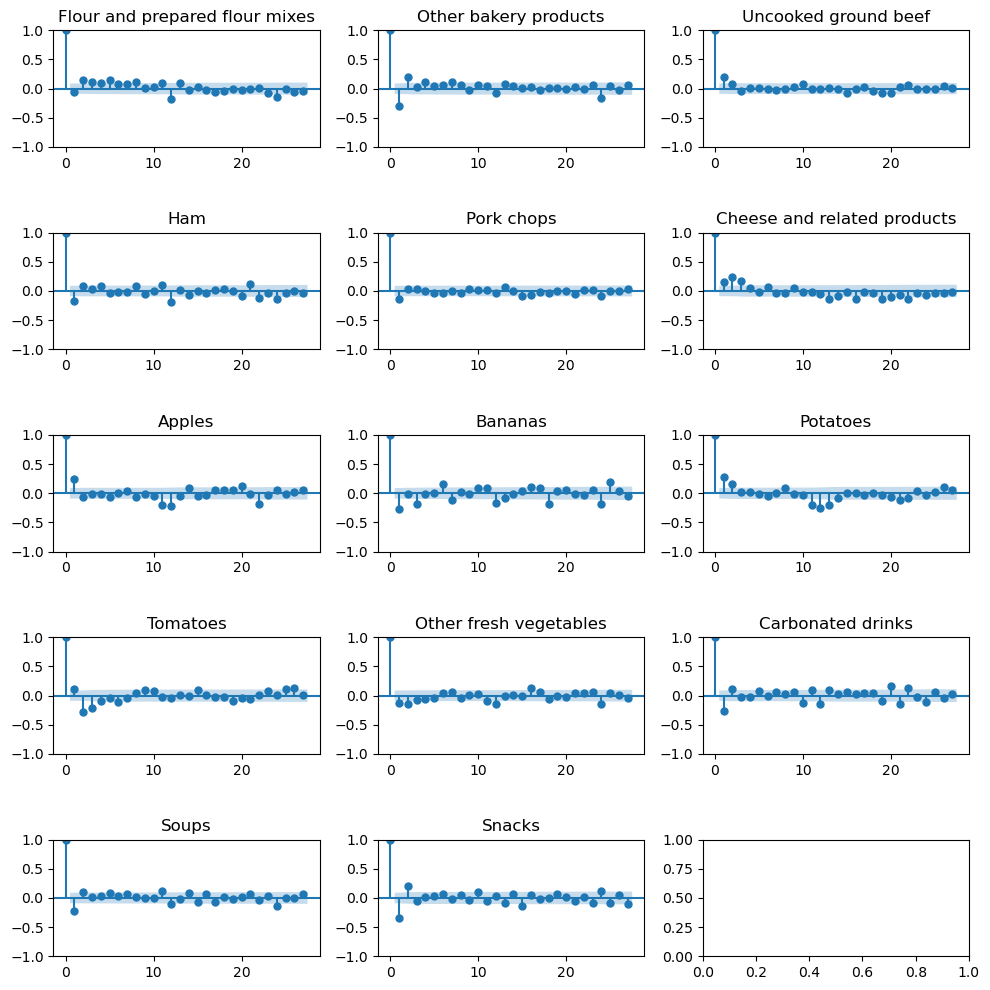

In [194]:
my_grid_plot(df_first_diff, option="acf", title='description')


In [ ]:
## St

In [195]:
# stationarity test
from statsmodels.tsa.stattools import adfuller
def adfuller_test(df, col, print_results=False):
    # extracting only the passengers count using values function
    values = df[col]

    # passing the extracted passengers count to adfuller function.
    # result of adfuller function is stored in a res variable
    res = adfuller(values)
    if print_results:
        print("Augmented Dickey Fuller for " + col)

        # Printing the statistical result of the adfuller test
        print('Augmneted Dickey_fuller Statistic: %f' % res[0])
        print('p-value: %f' % res[1])

        # printing the critical values at different alpha levels.
        print('critical values at different levels:')
        for k, v in res[4].items():
            print('\t%s: %.3f' % (k, v))
    else:
        return res

In [201]:
results = []
df_first_diff.dropna(inplace=True)
for name in df_first_diff.columns:
    res = adfuller_test(df_first_diff, name, print_results=False)
    results.append([name, res[1]])

results = pd.DataFrame(results, columns=['series', 'p-value'])
results

,series,p-value
0,CUSR0000SEFA01,4.825228e-07
1,CUSR0000SEFB04,4.949368e-05
2,CUSR0000SEFC01,3.200328e-30
3,CUSR0000SEFD02,1.013153e-08
4,CUSR0000SEFD03,0.000000e+00
5,CUSR0000SEFJ02,6.035928e-08
6,CUSR0000SEFK01,2.052638e-11
7,CUSR0000SEFK02,4.454782e-07
8,CUSR0000SEFL01,9.991575e-16
9,CUSR0000SEFL03,5.010693e-22
